# Курсовая работа по дисциплине СиАОД


## Выполнила студентка группы БФИ2203 Мячина Лада
***

# Задание

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
<br>| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
<br>Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями.

# Шаги для  решения задач:


<ol>
    <li>Импортировать библиотеку для работы с CSV файлами.</li>
    <li>Открыть CSV файл и считать данные в массив или хеш-таблицу.</li>
    <li>Создать переменную для хранения общей выручки магазина и проинициализировать ее нулем.</li>
    <li>Создать хеш-таблицу, где ключ будет названием товара, а значение - количеством продаж и общей выручкой для этого товара.</li>
    <li>Проитерироваться по каждой строке CSV файла и обновить значения хеш-таблицы в соответствии с данными из текущей строки.</li>
    <li>Вычислить общую выручку магазина, просуммировав общую стоимость из каждой строки CSV файла.</li>
    <li>Найти товар, который был продан наибольшее количество раз, пройдя по значениям хеш-таблицы и выбрав тот, у которого количество продаж максимально.</li>
    <li>Найти товар, который принес наибольшую выручку, пройдя по значениям хеш-таблицы и выбрав тот, у которого общая выручка максимальна.</li>
    <li>Создать отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товара и доле каждого товара в общей выручке.</li>
    <li>Закрыть файл и обработать возможные ошибки ввода-вывода в соответствии с требованиями.</li>
</ol>

***

# Выполнение

In [1]:
import csv
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

### Шаг 1
Читаем с файла

In [2]:
tablitsa = []
with open('table2.csv', encoding='UTF-8') as f:
    reader = csv.reader(f)
    for row in reader:
        tablitsa.append(row)

### Шаг 2
Составляем хэш-таблицу, где ключ — наименование товара, а значение — количество проданных единиц товара и общая выручка

In [3]:
sales_by_product = {}
# Проходим циклом по всем строкам массива, начиная со второй строки
for row in tablitsa[1:]:
    # Разбиваем строку на отдельные элементы
    order_number, order_date, product_name, category, quantity, price, total_price = row[0].split(';')

    # Извлекаем из строки необходимые данные
    product_name = product_name.strip()
    quantity = int(quantity)
    price = int(price)

    # Если товар уже есть в словаре продаж по товару, увеличиваем количество продаж и общую выручку
    if product_name in sales_by_product:
        sales_by_product[product_name][0] += quantity
        sales_by_product[product_name][1] += quantity * price
    # Если товара нет в словаре продаж по товару, создаем новую запись
    else:
        sales_by_product[product_name] = [quantity, quantity * price]


### Шаг 3
Проходим по всей таблице в поисках наибольших значений по количеству продаж, а также общей выручке. Параллельно расчитываем всю выручку магазина

In [4]:
# def binary_search(sales_by_product, low, high, key):
#     while low <= high:
#         mid = (low + high) // 2
#         if key in sales_by_product[mid]:
#             return mid
#         elif key < sales_by_product[mid]:
#             high = mid - 1
#         else:
#             low = mid + 1
#     return -1

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key[1][1] > arr[j][1][1]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

sorted_sales = list(sales_by_product.items())
insertion_sort(sorted_sales)
#sorted_sales = sorted(sales_by_product.items(), key=lambda x: x[1][1], reverse=True)

# находим продукт с максимальной выручкой
best_product_revenue = sorted_sales[0][0]
max_revenue = sorted_sales[0][1][1]

# находим продукт с максимальным количеством продаж
best_product_sold = sorted(sales_by_product.items(), key=lambda x: x[1][0], reverse=True)[0][0]
max_sales = sales_by_product[best_product_sold][0]

# находим общую выручку
Total_revenue = sum([sales_data[1] for _, sales_data in sorted_sales])

### Шаг 4
Подготавливаем данные для вывода отчётности через Pandas

In [5]:
products = []
solds =[]
revenues = []
dolya = []

for product, sales_data in sales_by_product.items():
    quantity_sold, total_revenue = sales_data
    products.append(product)
    solds.append(quantity_sold)
    revenues.append(total_revenue)
    dolya.append(total_revenue/Total_revenue*100)


# Создаем DataFrame из списков
df = pd.DataFrame({
    'Товар': products,
    'Количество проданных единиц': solds,
    'Выручка': revenues,
    'Доля в общей выручке %':  dolya
})

# Устанавливаем 'Товар' как индекс для удобства чтения таблицы
df['Товар'] = df['Товар'].str.replace('""', '"').str.slice(1, -1)
pd.set_option('display.width', 1000)

#### Вывод и построение гистограмм

                                                 Количество проданных единиц    Выручка  Доля в общей выручке %
Товар                                                                                                          
Смартфон "Технофон X"                                                    750   37500000                6.679280
Ноутбук "Электро Бук Аир"                                                500   40000000                7.124566
Телевизор "ВидеоМастер 4K"                                               100   15000000                2.671712
Планшет "Таблетик Pro"                                                   150    4500000                0.801514
Умные часы "СмартТайм"                                                  1000    7000000                1.246799
Компьютер "МегаКомп Pro"                                                1100  132000000               23.511066
Наушники "ЗвукоПро"                                                     1420   18460000                3

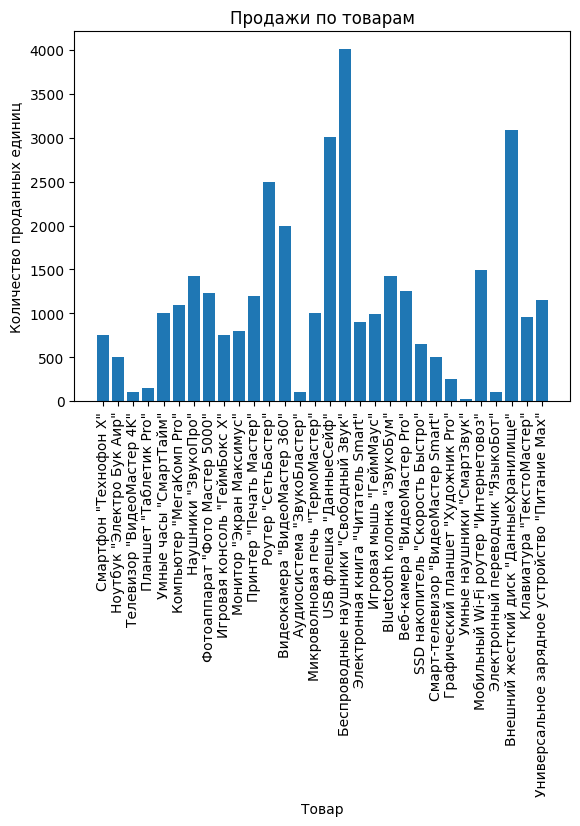

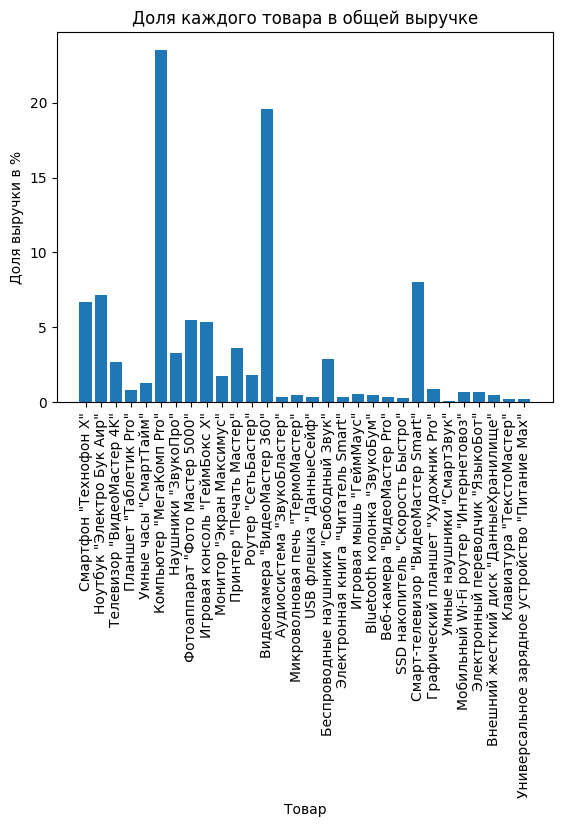

In [6]:
print(df.set_index('Товар'))
print("\n")
print(f"Общая выручка:", Total_revenue)
best_product_sold = best_product_sold.replace('""', '"')[1:-1]
print(f"Лучший товар: {best_product_sold} (с количеством продаж {max_sales})")
best_product_revenue = best_product_revenue.replace('""', '"')[1:-1]
print(f"Лучший товар: {best_product_revenue} (с общей выручкой {max_revenue})")

print("\n")
plt.bar(df['Товар'], df['Количество проданных единиц'])
plt.xlabel('Товар')
plt.ylabel('Количество проданных единиц')
plt.title('Продажи по товарам')
plt.xticks(rotation=90)
plt.show()

print("\n")
plt.bar(df['Товар'], df['Доля в общей выручке %'])
plt.xlabel('Товар')
plt.ylabel('Доля выручки в %')
plt.title('Доля каждого товара в общей выручке')
plt.xticks(rotation=90)
plt.show()